## Loading Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
%matplotlib inline

In [2]:
#Setting the directory path
os.chdir("/Users/HP/Desktop/edWisor/Sanatander Prediction") 
os.getcwd()

'C:\\Users\\HP\\Desktop\\edWisor\\Sanatander Prediction'

# Loading the datasets

In [3]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [19]:
train_df.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

In [6]:
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
train_df.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [8]:
train_df.describe(), test_df.describe()

(              target          var_0          var_1          var_2  \
 count  200000.000000  200000.000000  200000.000000  200000.000000   
 mean        0.100490      10.679914      -1.627622      10.715192   
 std         0.300653       3.040051       4.050044       2.640894   
 min         0.000000       0.408400     -15.043400       2.117100   
 25%         0.000000       8.453850      -4.740025       8.722475   
 50%         0.000000      10.524750      -1.608050      10.580000   
 75%         0.000000      12.758200       1.358625      12.516700   
 max         1.000000      20.315000      10.376800      19.353000   
 
                var_3          var_4          var_5          var_6  \
 count  200000.000000  200000.000000  200000.000000  200000.000000   
 mean        6.796529      11.078333      -5.065317       5.408949   
 std         2.043319       1.623150       7.863267       0.866607   
 min        -0.040200       5.074800     -32.562600       2.347300   
 25%         5.254

In [18]:
train_df.shape, test_df.shape

((200000, 202), (200000, 201))

In [21]:
#copying train_df to another variable
train_copy = train_df.copy()

In [59]:
train_df = train_copy.copy()

# Exploratory Data Analysis

In [22]:
#checking for any missing values in dataset
if True in list(train_df.isnull().any()):
    print('There are some null values here!\nVar_Name; number_of_nulls:')
    print(df_train[df_train.columns[df_train.isnull().any()]].isnull().sum())
else:
    print('No null values in your Dataset!')

No null values in your Dataset!


In [4]:
#dropping 'id' and 'target' column from the dataset
columns = list(train_df.columns)
columns = columns[2:]

# splitting the list every n elements:
n = 20
chunks = [columns[x:x + n] for x in range(0, len(columns), n)]

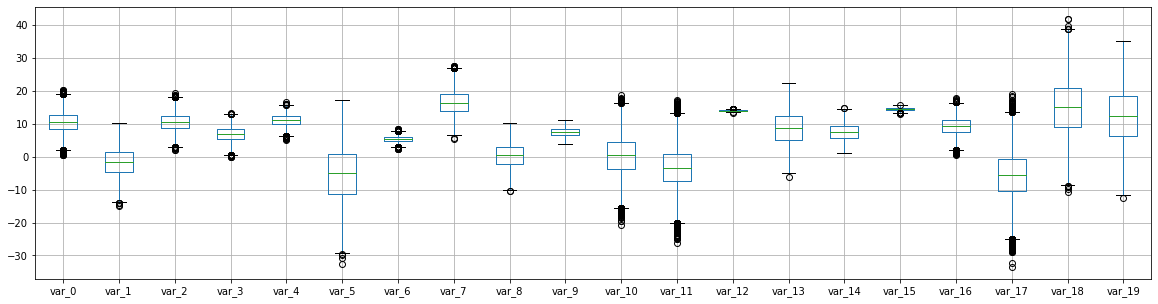

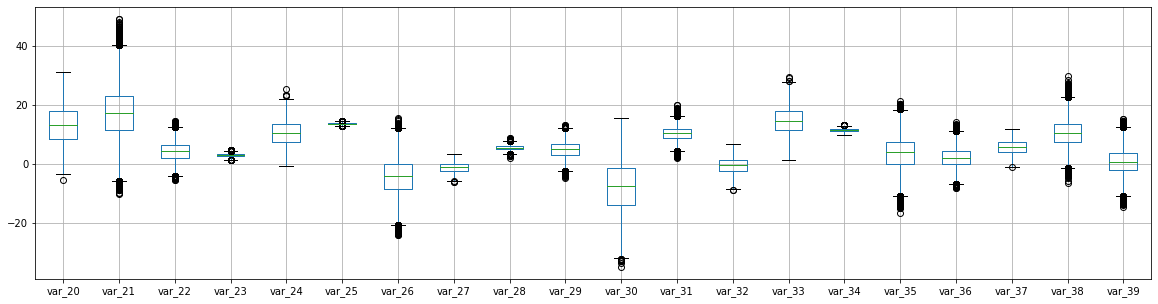

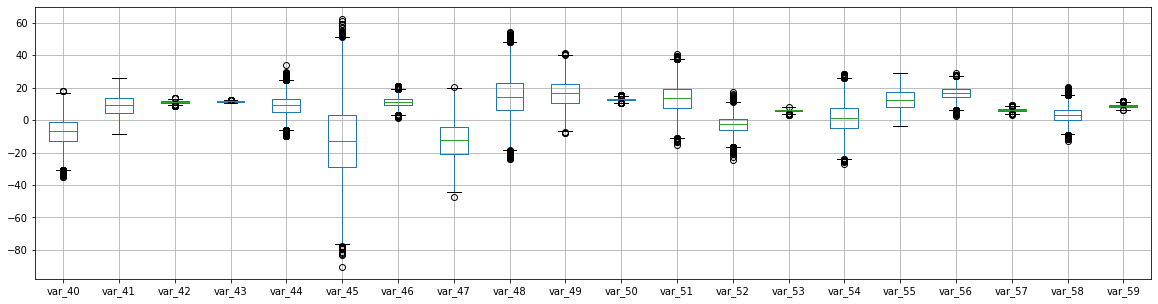

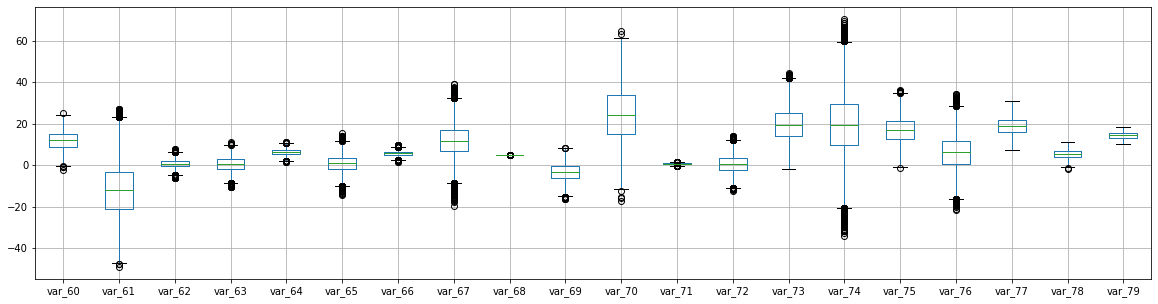

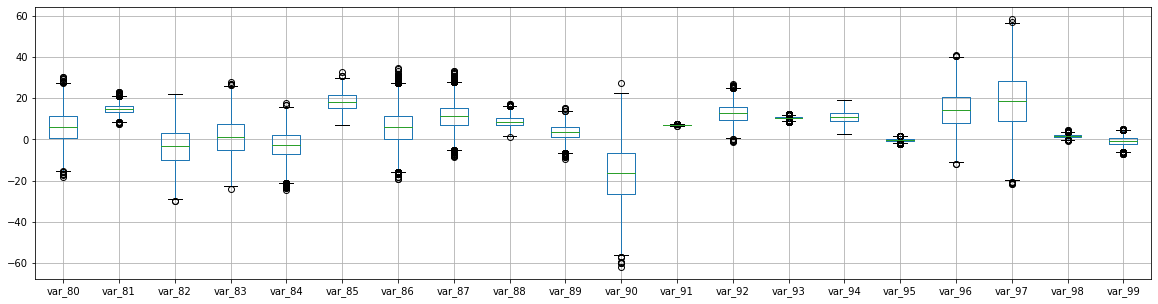

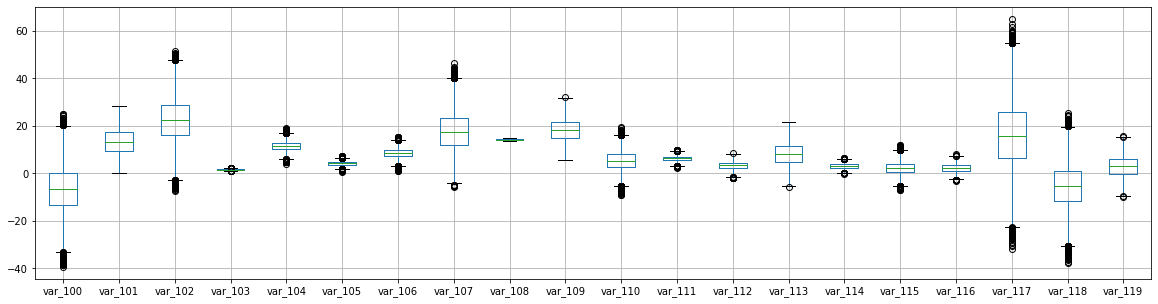

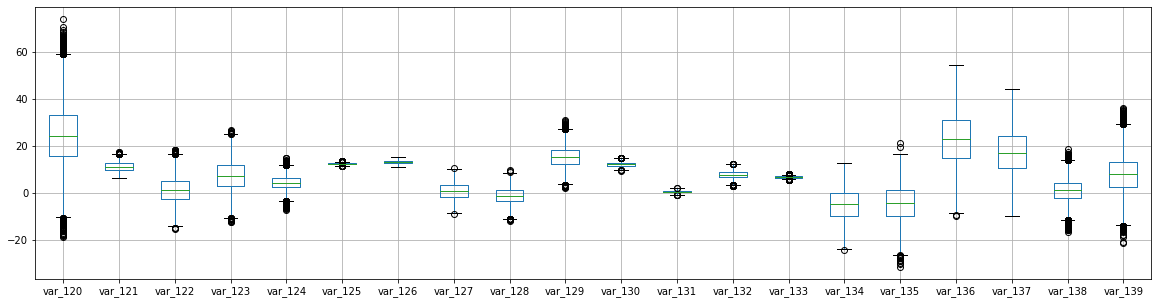

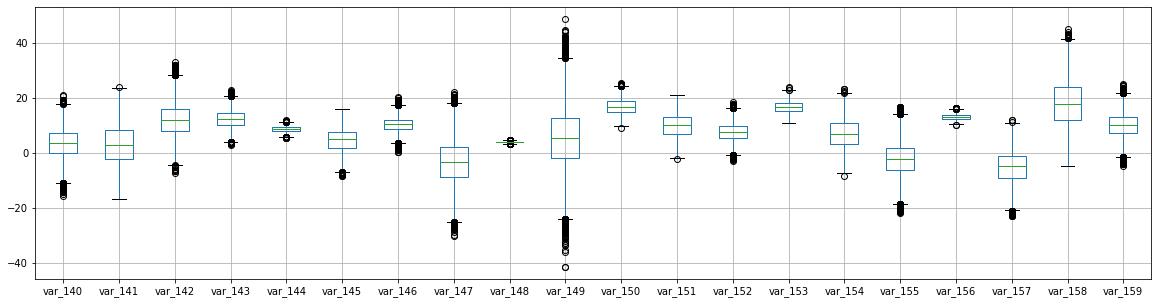

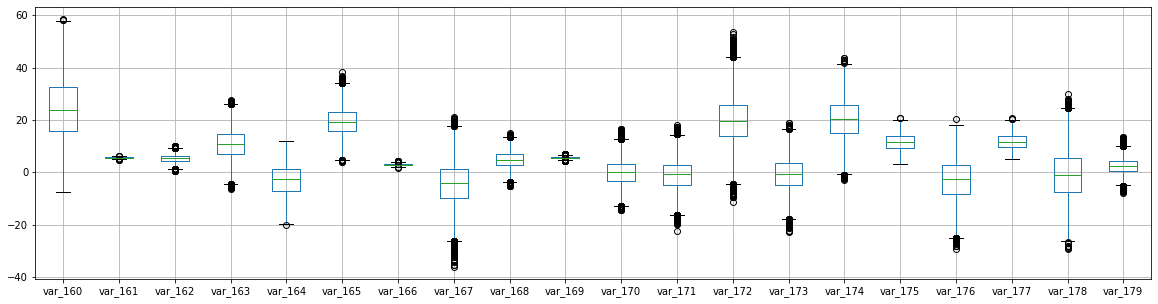

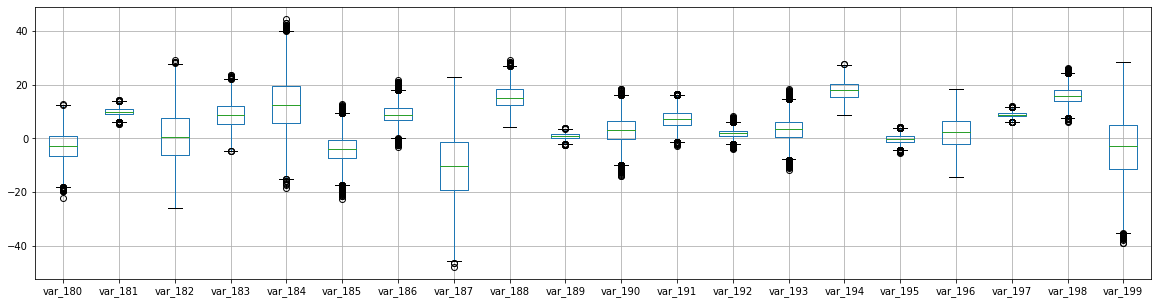

In [70]:
#Plot boxplot to visualize Outliers in training dataset
for i in chunks:
    plt.show(train_df.boxplot(column=i, figsize=(20,5)))


<Figure size 432x288 with 0 Axes>

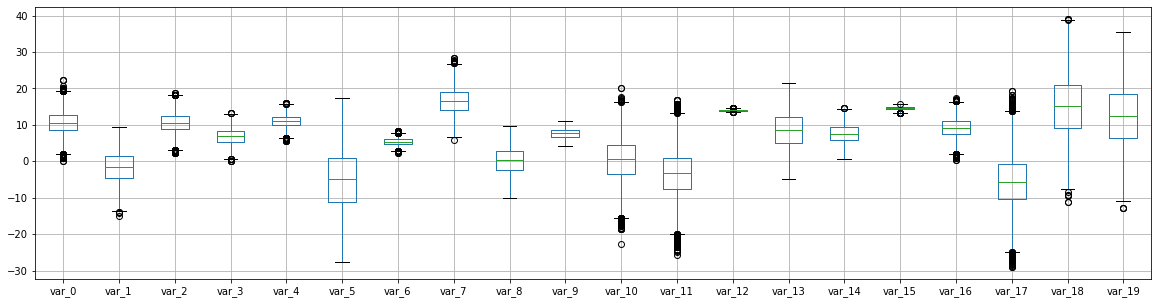

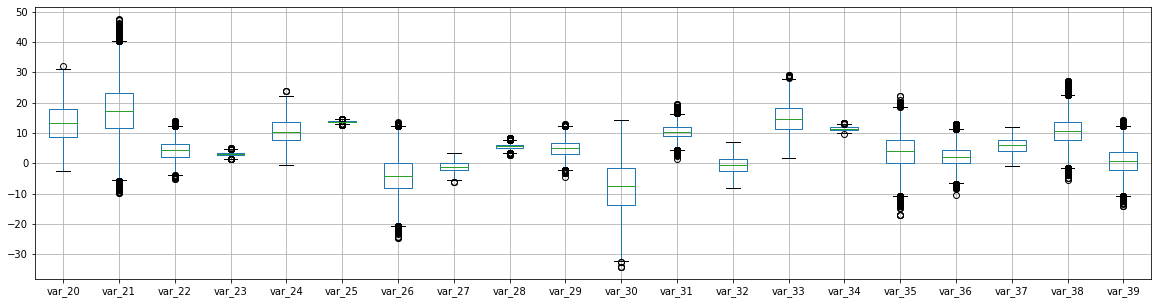

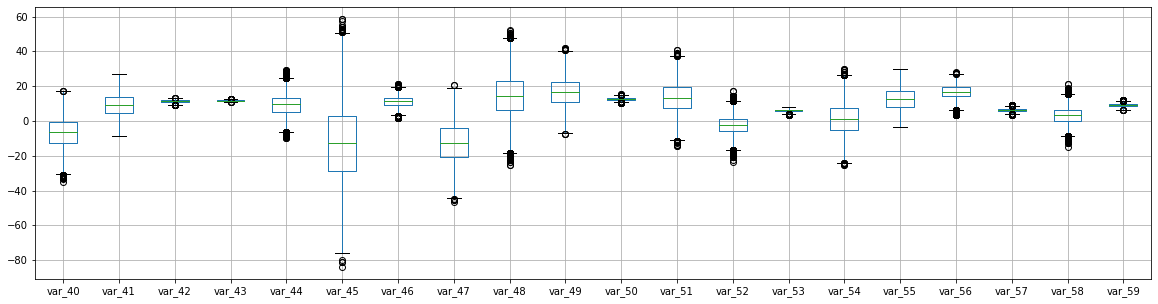

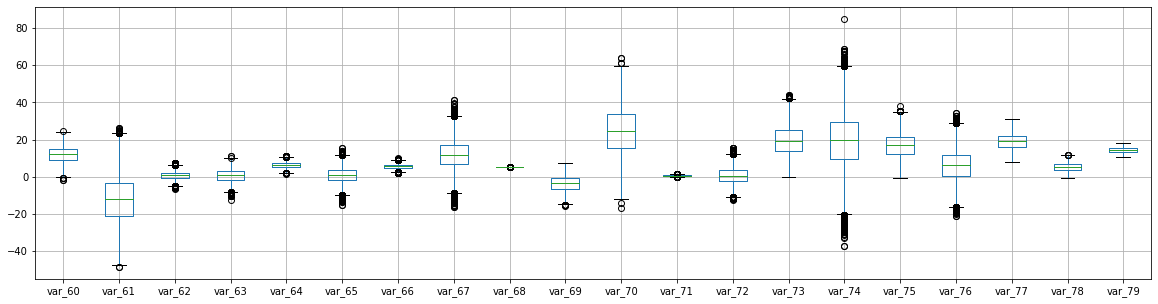

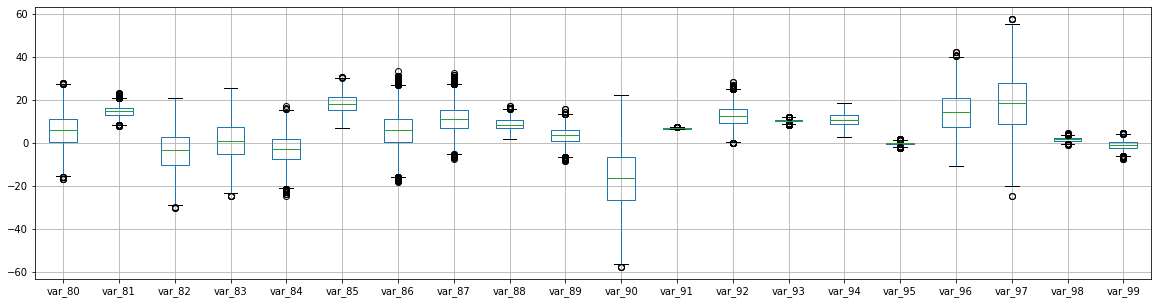

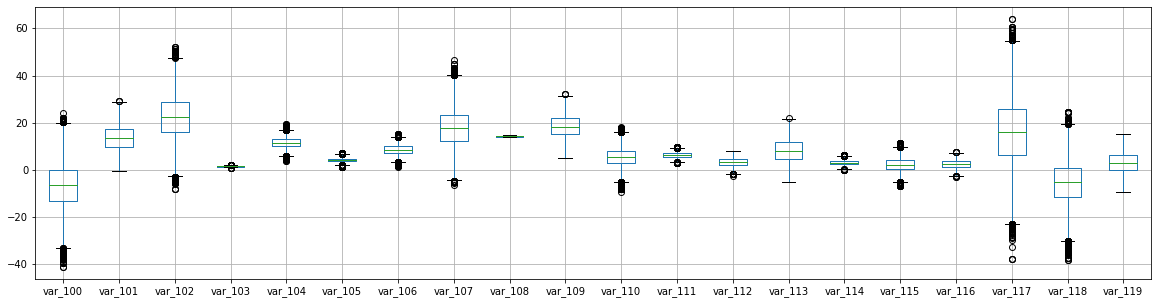

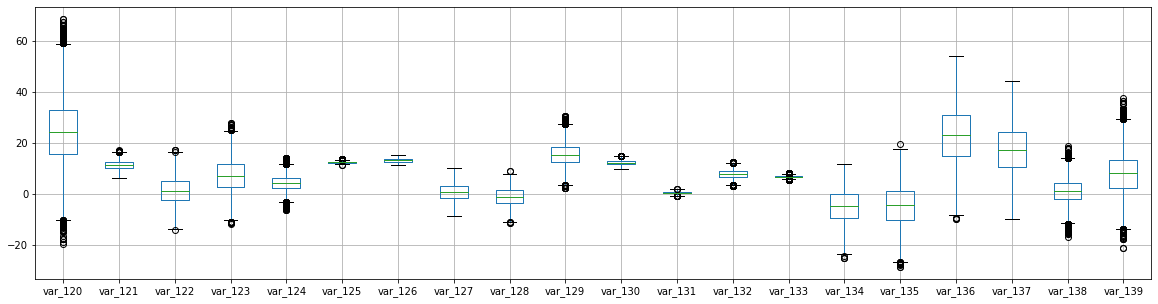

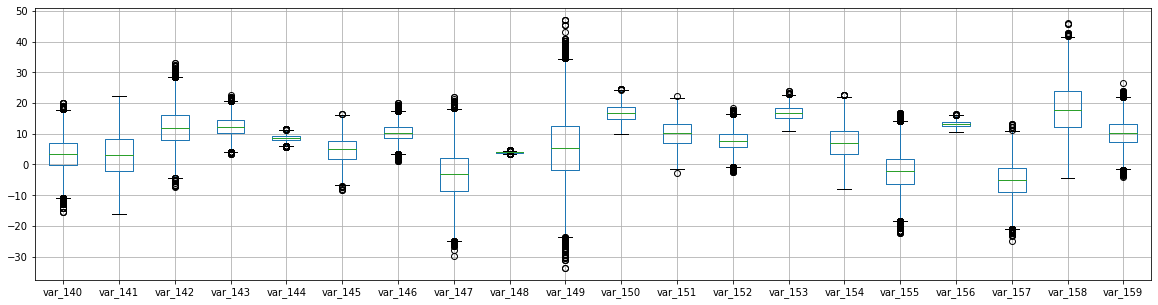

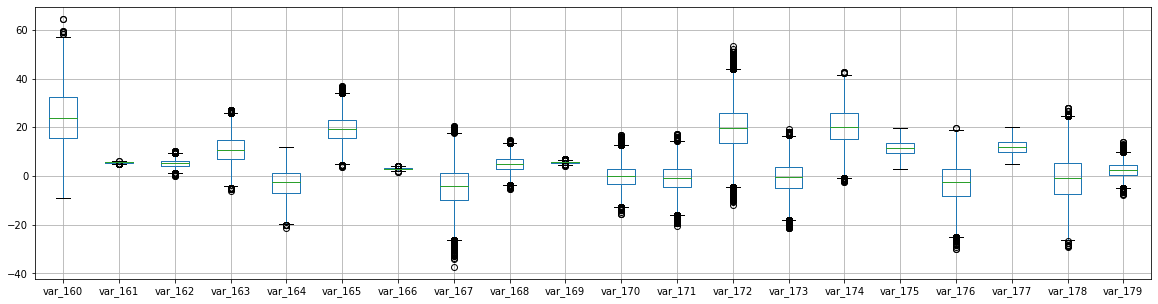

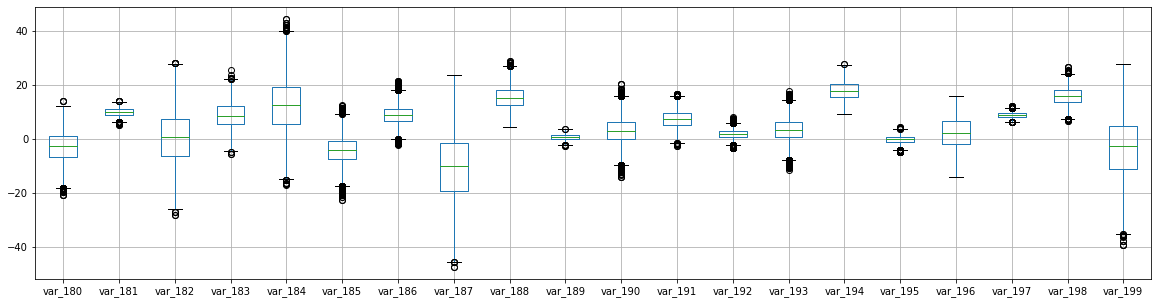

In [79]:
#Plot boxplot to visualize Outliers in test dataset
for i in chunks:
    plt.show(test_df.boxplot(column=i, figsize=(20,5)))

In [5]:
#detecting and dropping outliers in the dateset

def outliers(df):
    sum_outliers = 0
    for i in columns:
        ##extracting quartiles
        q75, q25 = np.percentile(df[i], [75 ,25])

        ##Calculate IQR
        iqr = q75 - q25

        ##Calculate inner and outer fence
        minimum = q25 - (iqr*1.5)
        maximum = q75 + (iqr*1.5)
                   
        ##Dropping the rows after deleting the outliers
        df = df.loc[(df.loc[:,i] > minimum) & (df.loc[:,i] < maximum)]
                
    return df


In [6]:
test_df = outliers(test_df)
train_df = outliers(train_df)

In [82]:
test_df.shape, train_df.shape

((174574, 201), (175070, 202))

In [ ]:
print("Distribution of Columns")
plt.figure(figsize=(40,200))
for i,col in enumerate(columns):
    plt.subplot(50,4,i+1)
    plt.hist(train_df[col])
    plt.title(col)

# Feature Selection


In [16]:
#copying train_df to train_copy
train_copy = train_df.copy()

In [89]:
##Correlation analysis
#Correlation plot

df_corr = train_df.loc[:,columns]

(61.1035, -76.5496)

In [101]:
#Generate correlation matrix
corr = df_corr.corr()
#np.fill_diagonal(corr.values,np.nan)
#corr.max().max(), corr.min().min()

In [102]:
correlations = corr.abs().unstack().sort_values(kind="quicksort", ascending = False).reset_index().rename(columns={"level_0":"Variable1", "level_1":"Variable2"})
correlations = correlations[correlations['Variable1'] != correlations['Variable2']]
correlations.head()

,Variable1,Variable2,0
200,var_162,var_127,0.010292
201,var_127,var_162,0.010292
202,var_26,var_139,0.009929
203,var_139,var_26,0.009929
204,var_183,var_189,0.009834


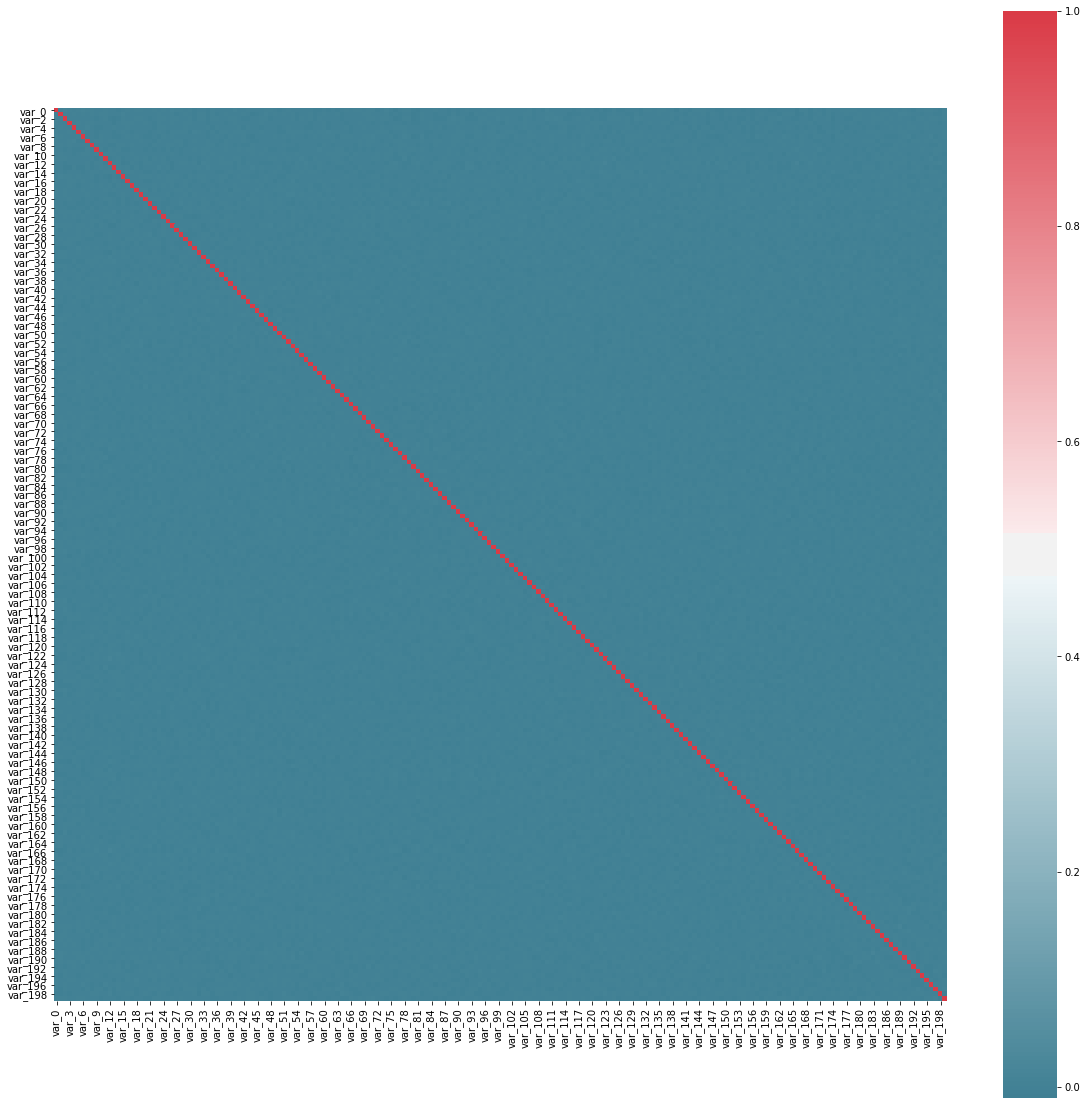

In [104]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(20, 20))

#Plot using seaborn library
correlation_plot = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
fig = correlation_plot.get_figure()
fig.savefig("correlation_heatmap.png")


In [100]:
np.fill_diagonal(corr.values,np.nan)
corr.max().max(), corr.min().min()

(0.009833584703433004, -0.010291520700875701)

In [105]:
train_df[train_df.loc[:,'var_0':].duplicated()]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


In [106]:
test_df[test_df.loc[:,'var_0':].duplicated()]

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199



# Checking for imbalaced dataset

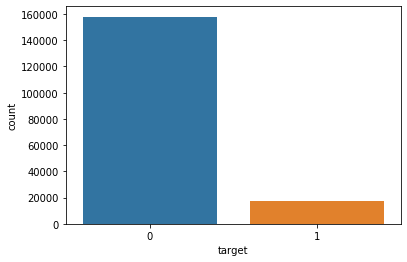

In [107]:
sns.countplot(data=train_df, x="target")

In [108]:
mylst = list(train_df["target"].value_counts())
zero = round(float((mylst[0]/sum(mylst))*100),2)
one = round(float((mylst[1]/sum(mylst))*100),2)
print('The dataset has {zero} % of target 0 and {one} % of target 1'.format(zero=zero, one=one))

The dataset has 90.23 % of target 0 and 9.77 % of target 1


In [7]:
##Splitting the dataset into X(independent variables) and y(target variable)
X=train_df[columns]
y=train_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [9]:
model = LogisticRegression()
model.fit(rescaledX_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Use model to predict instances from the test set and store it
y_pred = model.predict(rescaledX_test)

In [11]:
# Get the accuracy score of model
print("Accuracy of logistic regression classifier: ", model.score(rescaledX_test, y_test))

#Get the recall score of the model
print("Recall of logistic regression classifier: ", recall_score(y_test, y_pred))

#Get the precision score of the model
print("Precision of logistic regression classifier: ", precision_score(y_test, y_pred))

#Get the F-score of the model
print("F-score of logistic regression classifier: ", f1_score(y_test, y_pred))

#Get the ROC-AUC score of the model
print("ROC-AUC score of logistic regression classifier: ", roc_auc_score(y_test, y_pred))

# The confusion matrix of the model
print(confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  0.9161560563575311
Recall of logistic regression classifier:  0.26517173874354866
Precision of logistic regression classifier:  0.6757369614512472
F-score of logistic regression classifier:  0.380879345603272
ROC-AUC score of logistic regression classifier:  0.6257313012574995
[[51440   715]
 [ 4129  1490]]


In [114]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(rescaledX_train, y_train)
np.bincount(y_train_smote)

array([105813, 105813], dtype=int64)

In [115]:
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
y_pred_smote = model_smote.predict(rescaledX_test)

In [117]:
# Get the accuracy score of model
print("Accuracy of logistic regression classifier after applyig SMOTE: ", model_smote.score(rescaledX_test, y_test))

#Get the recall score of the model
print("Recall of logistic regression classifier after applying SMOTE: ", recall_score(y_test, y_pred_smote))

#Get the precision score of the model
print("Precision of logistic regression classifier after applying SMOTE: ", precision_score(y_test, y_pred_smote))

#Get the F-score of the model
print("F-score of logistic regression classifier after applying SMOTE: ", f1_score(y_test, y_pred_smote))

#Get the ROC-AUC score of the model
print("ROC-AUC score of logistic regression classifier after applying SMOTE: ", roc_auc_score(y_test, y_pred_smote))

# The confusion matrix of the model
print(confusion_matrix(y_test, y_pred_smote))

Accuracy of logistic regression classifier after applyig SMOTE:  0.7849724789697788
Recall of logistic regression classifier after applying SMOTE:  0.7634810464495462
[[41061 11094]
 [ 1329  4290]]


# Random Forest Classifier

## No. of trees = 10

In [ ]:
model_random = RandomForestClassifier(n_estimators=10, bootstrap = True, max_features = 'sqrt')
model_random.fit(rescaledX_train, y_train)

In [ ]:
y_pred_random = model_random.predict(rescaledX_test)

In [ ]:
# Get the accuracy score of model
print("Accuracy of RandomForest: ", model_random.score(rescaledX_test, y_test))

#Get the recall score of the model
print("Recall of RandomForest: ", recall_score(y_test, y_pred_random))

#Get the precision score of the model
print("Precision of RandomForest: ", precision_score(y_test, y_pred_random))

#Get the F-score of the model
print("F-score of RandomForest: ", f1_score(y_test, y_pred_random))

#Get the ROC-AUC score of the model
print("ROC-AUC score of RandomForest: ", roc_auc_score(y_test, y_pred_random))

# The confusion matrix of the model
print(confusion_matrix(y_test, y_pred_random))

## No. of trees = 30

In [ ]:
model_random = RandomForestClassifier(n_estimators=30, bootstrap = True, max_features = 'sqrt')
model_random.fit(rescaledX_train, y_train)

In [ ]:
y_pred_random = model_random.predict(rescaledX_test)

In [ ]:
# Get the accuracy score of model
print("Accuracy of RandomForest: ", model_random.score(rescaledX_test, y_test))

#Get the recall score of the model
print("Recall of RandomForest: ", recall_score(y_test, y_pred_random))

#Get the precision score of the model
print("Precision of RandomForest: ", precision_score(y_test, y_pred_random))

#Get the F-score of the model
print("F-score of RandomForest: ", f1_score(y_test, y_pred_random))

#Get the ROC-AUC score of the model
print("ROC-AUC score of RandomForest: ", roc_auc_score(y_test, y_pred_random))

# The confusion matrix of the model
print(confusion_matrix(y_test, y_pred_random))

## No. of trees = 5

In [ ]:
model_random = RandomForestClassifier(n_estimators=5, bootstrap = True, max_features = 'sqrt')
model_random.fit(rescaledX_train, y_train)

In [ ]:
y_pred_random = model_random.predict(rescaledX_test)

In [ ]:
# Get the accuracy score of model
print("Accuracy of RandomForest: ", model_random.score(rescaledX_test, y_test))

#Get the recall score of the model
print("Recall of RandomForest: ", recall_score(y_test, y_pred_random))

#Get the precision score of the model
print("Precision of RandomForest: ", precision_score(y_test, y_pred_random))

#Get the F-score of the model
print("F-score of RandomForest: ", f1_score(y_test, y_pred_random))

#Get the ROC-AUC score of the model
print("ROC-AUC score of RandomForest: ", roc_auc_score(y_test, y_pred_random))

# The confusion matrix of the model
print(confusion_matrix(y_test, y_pred_random))

# Support Vector Machine Algo

In [ ]:
# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(rescaledX_train, y_train)

In [ ]:
y_pred_svm = clf.predict(rescaledX_test)

In [ ]:
# Get the accuracy score of model
print("Accuracy of SVM: ", model_random.score(rescaledX_test, y_test))

#Get the recall score of the model
print("Recall of SVM: ", recall_score(y_test, y_pred_svm))

#Get the precision score of the model
print("Precision of SVM: ", precision_score(y_test, y_pred_svm))

#Get the F-score of the model
print("F-score of SVM: ", f1_score(y_test, y_pred_svm))

#Get the ROC-AUC score of the model
print("ROC-AUC score of SVM: ", roc_auc_score(y_test, y_pred_svm))

# The confusion matrix of the model
print(confusion_matrix(y_test, y_pred_svm))

# Light GBM

In [ ]:
#Training the model
#training data
lgb_train=lgb.Dataset(X_train,label=y_train)
#validation data
lgb_test=lgb.Dataset(X_test,label=y_test)

In [ ]:
#Selecting best hyperparameters by tuning of different parameters
params={'boosting_type': 'gbdt', 
          'max_depth' : -1, #no limit for max_depth if <0
          'objective': 'binary',
          'boost_from_average':False, 
          'nthread': 20,
          'metric':'auc',
          'num_leaves': 50,
          'learning_rate': 0.01,
          'max_bin': 100,      #default 255
          'subsample_for_bin': 100,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'bagging_fraction':0.5,
          'bagging_freq':5,
          'feature_fraction':0.08,
          'min_split_gain': 0.45, #>0
          'min_child_weight': 1,
          'min_child_samples': 5,
          'is_unbalance':True,
          }

In [ ]:
num_rounds=10000
lgbm= lgb.train(params,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_test],verbose_eval=1000,early_stopping_rounds = 5000)
lgbm

In [ ]:
#predict the model
#probability predictions
lgbm_predict_prob=lgbm.predict(X_test,random_state=42,num_iteration=lgbm.best_iteration)
#Convert to binary output 1 or 0
lgbm_predict=np.where(lgbm_predict_prob>=0.5,1,0)
print(lgbm_predict_prob)
print(lgbm_predict)

In [ ]:
# The confusion matrix of the model
print(confusion_matrix(y_test, lgbm_predict))
#Accuracy = 0.89

In [ ]:
#Get the recall score of the model
print("Recall of Light GBM: ", recall_score(y_test, lgbm_predict))

#Get the precision score of the model
print("Precision of Light GBM: ", precision_score(y_test, lgbm_predict))

#Get the F-score of the model
print("F-score of Light GBM: ", f1_score(y_test, lgbm_predict))

#Get the ROC-AUC score of the model
print("ROC-AUC score of Light GBM: ", roc_auc_score(y_test, lgbm_predict))

In [ ]:
lgbm_predict_prob = lgbm.predict(test_df[columns], ,random_state=42,num_iteration=lgbm.best_iteration)
lgbm_predict=np.where(lgbm_predict_prob>=0.5,1,0)
print(lgbm_predict_prob)
print(lgbm_predict)

sub_df=pd.DataFrame({'ID_code':test_df['ID_code'].values})
sub_df['lgbm_predict_prob']=lgbm_predict_prob
sub_df['lgbm_predict']=lgbm_predict
sub_df.to_csv('submission.csv',index=False)
sub_df.head()